In [14]:
# !pip install tensorflow

In [1]:
import os
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\Aravind\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
directory = "C:\\Users\\Aravind\\Downloads\\nf_prize_dataset\\training_set"
data_list = []

In [3]:
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".txt"):
        print(f"Processing {filename}..")
        file_path = os.path.join(directory, filename)
        movie_id = int(filename.split('.')[0].lstrip('mv_'))
        df = pd.read_csv(file_path, header=None, names=["CustomerID", "Rating", "Date_user_rated"], skiprows=1)
        df['MovieID'] = movie_id
        data_list.append(df)

Processing mv_0000001.txt..
Processing mv_0000002.txt..
Processing mv_0000003.txt..
Processing mv_0000004.txt..
Processing mv_0000005.txt..
Processing mv_0000006.txt..
Processing mv_0000007.txt..
Processing mv_0000008.txt..
Processing mv_0000009.txt..
Processing mv_0000010.txt..
Processing mv_0000011.txt..
Processing mv_0000012.txt..
Processing mv_0000013.txt..
Processing mv_0000014.txt..
Processing mv_0000015.txt..
Processing mv_0000016.txt..
Processing mv_0000017.txt..
Processing mv_0000018.txt..
Processing mv_0000019.txt..
Processing mv_0000020.txt..
Processing mv_0000021.txt..
Processing mv_0000022.txt..
Processing mv_0000023.txt..
Processing mv_0000024.txt..
Processing mv_0000025.txt..
Processing mv_0000026.txt..
Processing mv_0000027.txt..
Processing mv_0000028.txt..
Processing mv_0000029.txt..
Processing mv_0000030.txt..
Processing mv_0000031.txt..
Processing mv_0000032.txt..
Processing mv_0000033.txt..
Processing mv_0000034.txt..
Processing mv_0000035.txt..
Processing mv_000003

Processing mv_0000296.txt..
Processing mv_0000297.txt..
Processing mv_0000298.txt..
Processing mv_0000299.txt..
Processing mv_0000300.txt..
Processing mv_0000301.txt..
Processing mv_0000302.txt..
Processing mv_0000303.txt..
Processing mv_0000304.txt..
Processing mv_0000305.txt..
Processing mv_0000306.txt..
Processing mv_0000307.txt..
Processing mv_0000308.txt..
Processing mv_0000309.txt..
Processing mv_0000310.txt..
Processing mv_0000311.txt..
Processing mv_0000312.txt..
Processing mv_0000313.txt..
Processing mv_0000314.txt..
Processing mv_0000315.txt..
Processing mv_0000316.txt..
Processing mv_0000317.txt..
Processing mv_0000318.txt..
Processing mv_0000319.txt..
Processing mv_0000320.txt..
Processing mv_0000321.txt..
Processing mv_0000322.txt..
Processing mv_0000323.txt..
Processing mv_0000324.txt..
Processing mv_0000325.txt..
Processing mv_0000326.txt..
Processing mv_0000327.txt..
Processing mv_0000328.txt..
Processing mv_0000329.txt..
Processing mv_0000330.txt..
Processing mv_000033

Processing mv_0000593.txt..
Processing mv_0000594.txt..
Processing mv_0000595.txt..
Processing mv_0000596.txt..
Processing mv_0000597.txt..
Processing mv_0000598.txt..
Processing mv_0000599.txt..
Processing mv_0000600.txt..
Processing mv_0000601.txt..
Processing mv_0000602.txt..
Processing mv_0000603.txt..
Processing mv_0000604.txt..
Processing mv_0000605.txt..
Processing mv_0000606.txt..
Processing mv_0000607.txt..
Processing mv_0000608.txt..
Processing mv_0000609.txt..
Processing mv_0000610.txt..
Processing mv_0000611.txt..
Processing mv_0000612.txt..
Processing mv_0000613.txt..
Processing mv_0000614.txt..
Processing mv_0000615.txt..
Processing mv_0000616.txt..
Processing mv_0000617.txt..
Processing mv_0000618.txt..
Processing mv_0000619.txt..
Processing mv_0000620.txt..
Processing mv_0000621.txt..
Processing mv_0000622.txt..
Processing mv_0000623.txt..
Processing mv_0000624.txt..
Processing mv_0000625.txt..
Processing mv_0000626.txt..
Processing mv_0000627.txt..
Processing mv_000062

Processing mv_0000888.txt..
Processing mv_0000889.txt..
Processing mv_0000890.txt..
Processing mv_0000891.txt..
Processing mv_0000892.txt..
Processing mv_0000893.txt..
Processing mv_0000894.txt..
Processing mv_0000895.txt..
Processing mv_0000896.txt..
Processing mv_0000897.txt..
Processing mv_0000898.txt..
Processing mv_0000899.txt..
Processing mv_0000900.txt..
Processing mv_0000901.txt..
Processing mv_0000902.txt..
Processing mv_0000903.txt..
Processing mv_0000904.txt..
Processing mv_0000905.txt..
Processing mv_0000906.txt..
Processing mv_0000907.txt..
Processing mv_0000908.txt..
Processing mv_0000909.txt..
Processing mv_0000910.txt..
Processing mv_0000911.txt..
Processing mv_0000912.txt..
Processing mv_0000913.txt..
Processing mv_0000914.txt..
Processing mv_0000915.txt..
Processing mv_0000916.txt..
Processing mv_0000917.txt..
Processing mv_0000918.txt..
Processing mv_0000919.txt..
Processing mv_0000920.txt..
Processing mv_0000921.txt..
Processing mv_0000922.txt..
Processing mv_000092

Processing mv_0001181.txt..
Processing mv_0001182.txt..
Processing mv_0001183.txt..
Processing mv_0001184.txt..
Processing mv_0001185.txt..
Processing mv_0001186.txt..
Processing mv_0001187.txt..
Processing mv_0001188.txt..
Processing mv_0001189.txt..
Processing mv_0001190.txt..
Processing mv_0001191.txt..
Processing mv_0001192.txt..
Processing mv_0001193.txt..
Processing mv_0001194.txt..
Processing mv_0001195.txt..
Processing mv_0001196.txt..
Processing mv_0001197.txt..
Processing mv_0001198.txt..
Processing mv_0001199.txt..
Processing mv_0001200.txt..
Processing mv_0001201.txt..
Processing mv_0001202.txt..
Processing mv_0001203.txt..
Processing mv_0001204.txt..
Processing mv_0001205.txt..
Processing mv_0001206.txt..
Processing mv_0001207.txt..
Processing mv_0001208.txt..
Processing mv_0001209.txt..
Processing mv_0001210.txt..
Processing mv_0001211.txt..
Processing mv_0001212.txt..
Processing mv_0001213.txt..
Processing mv_0001214.txt..
Processing mv_0001215.txt..
Processing mv_000121

Processing mv_0001487.txt..
Processing mv_0001488.txt..
Processing mv_0001489.txt..
Processing mv_0001490.txt..
Processing mv_0001491.txt..
Processing mv_0001492.txt..
Processing mv_0001493.txt..
Processing mv_0001494.txt..
Processing mv_0001495.txt..
Processing mv_0001496.txt..
Processing mv_0001497.txt..
Processing mv_0001498.txt..
Processing mv_0001499.txt..
Processing mv_0001500.txt..
Processing mv_0001501.txt..
Processing mv_0001502.txt..
Processing mv_0001503.txt..
Processing mv_0001504.txt..
Processing mv_0001505.txt..
Processing mv_0001506.txt..
Processing mv_0001507.txt..
Processing mv_0001508.txt..
Processing mv_0001509.txt..
Processing mv_0001510.txt..
Processing mv_0001511.txt..
Processing mv_0001512.txt..
Processing mv_0001513.txt..
Processing mv_0001514.txt..
Processing mv_0001515.txt..
Processing mv_0001516.txt..
Processing mv_0001517.txt..
Processing mv_0001518.txt..
Processing mv_0001519.txt..
Processing mv_0001520.txt..
Processing mv_0001521.txt..
Processing mv_000152

Processing mv_0001784.txt..
Processing mv_0001785.txt..
Processing mv_0001786.txt..
Processing mv_0001787.txt..
Processing mv_0001788.txt..
Processing mv_0001789.txt..
Processing mv_0001790.txt..
Processing mv_0001791.txt..
Processing mv_0001792.txt..
Processing mv_0001793.txt..
Processing mv_0001794.txt..
Processing mv_0001795.txt..
Processing mv_0001796.txt..
Processing mv_0001797.txt..
Processing mv_0001798.txt..
Processing mv_0001799.txt..
Processing mv_0001800.txt..
Processing mv_0001801.txt..
Processing mv_0001802.txt..
Processing mv_0001803.txt..
Processing mv_0001804.txt..
Processing mv_0001805.txt..
Processing mv_0001806.txt..
Processing mv_0001807.txt..
Processing mv_0001808.txt..
Processing mv_0001809.txt..
Processing mv_0001810.txt..
Processing mv_0001811.txt..
Processing mv_0001812.txt..
Processing mv_0001813.txt..
Processing mv_0001814.txt..
Processing mv_0001815.txt..
Processing mv_0001816.txt..
Processing mv_0001817.txt..
Processing mv_0001818.txt..
Processing mv_000181

Processing mv_0002079.txt..
Processing mv_0002080.txt..
Processing mv_0002081.txt..
Processing mv_0002082.txt..
Processing mv_0002083.txt..
Processing mv_0002084.txt..
Processing mv_0002085.txt..
Processing mv_0002086.txt..
Processing mv_0002087.txt..
Processing mv_0002088.txt..
Processing mv_0002089.txt..
Processing mv_0002090.txt..
Processing mv_0002091.txt..
Processing mv_0002092.txt..
Processing mv_0002093.txt..
Processing mv_0002094.txt..
Processing mv_0002095.txt..
Processing mv_0002096.txt..
Processing mv_0002097.txt..
Processing mv_0002098.txt..
Processing mv_0002099.txt..
Processing mv_0002100.txt..
Processing mv_0002101.txt..
Processing mv_0002102.txt..
Processing mv_0002103.txt..
Processing mv_0002104.txt..
Processing mv_0002105.txt..
Processing mv_0002106.txt..
Processing mv_0002107.txt..
Processing mv_0002108.txt..
Processing mv_0002109.txt..
Processing mv_0002110.txt..
Processing mv_0002111.txt..
Processing mv_0002112.txt..
Processing mv_0002113.txt..
Processing mv_000211

Processing mv_0002373.txt..
Processing mv_0002374.txt..
Processing mv_0002375.txt..
Processing mv_0002376.txt..
Processing mv_0002377.txt..
Processing mv_0002378.txt..
Processing mv_0002379.txt..
Processing mv_0002380.txt..
Processing mv_0002381.txt..
Processing mv_0002382.txt..
Processing mv_0002383.txt..
Processing mv_0002384.txt..
Processing mv_0002385.txt..
Processing mv_0002386.txt..
Processing mv_0002387.txt..
Processing mv_0002388.txt..
Processing mv_0002389.txt..
Processing mv_0002390.txt..
Processing mv_0002391.txt..
Processing mv_0002392.txt..
Processing mv_0002393.txt..
Processing mv_0002394.txt..
Processing mv_0002395.txt..
Processing mv_0002396.txt..
Processing mv_0002397.txt..
Processing mv_0002398.txt..
Processing mv_0002399.txt..
Processing mv_0002400.txt..
Processing mv_0002401.txt..
Processing mv_0002402.txt..
Processing mv_0002403.txt..
Processing mv_0002404.txt..
Processing mv_0002405.txt..
Processing mv_0002406.txt..
Processing mv_0002407.txt..
Processing mv_000240

Processing mv_0002672.txt..
Processing mv_0002673.txt..
Processing mv_0002674.txt..
Processing mv_0002675.txt..
Processing mv_0002676.txt..
Processing mv_0002677.txt..
Processing mv_0002678.txt..
Processing mv_0002679.txt..
Processing mv_0002680.txt..
Processing mv_0002681.txt..
Processing mv_0002682.txt..
Processing mv_0002683.txt..
Processing mv_0002684.txt..
Processing mv_0002685.txt..
Processing mv_0002686.txt..
Processing mv_0002687.txt..
Processing mv_0002688.txt..
Processing mv_0002689.txt..
Processing mv_0002690.txt..
Processing mv_0002691.txt..
Processing mv_0002692.txt..
Processing mv_0002693.txt..
Processing mv_0002694.txt..
Processing mv_0002695.txt..
Processing mv_0002696.txt..
Processing mv_0002697.txt..
Processing mv_0002698.txt..
Processing mv_0002699.txt..
Processing mv_0002700.txt..
Processing mv_0002701.txt..
Processing mv_0002702.txt..
Processing mv_0002703.txt..
Processing mv_0002704.txt..
Processing mv_0002705.txt..
Processing mv_0002706.txt..
Processing mv_000270

Processing mv_0002970.txt..
Processing mv_0002971.txt..
Processing mv_0002972.txt..
Processing mv_0002973.txt..
Processing mv_0002974.txt..
Processing mv_0002975.txt..
Processing mv_0002976.txt..
Processing mv_0002977.txt..
Processing mv_0002978.txt..
Processing mv_0002979.txt..
Processing mv_0002980.txt..
Processing mv_0002981.txt..
Processing mv_0002982.txt..
Processing mv_0002983.txt..
Processing mv_0002984.txt..
Processing mv_0002985.txt..
Processing mv_0002986.txt..
Processing mv_0002987.txt..
Processing mv_0002988.txt..
Processing mv_0002989.txt..
Processing mv_0002990.txt..
Processing mv_0002991.txt..
Processing mv_0002992.txt..
Processing mv_0002993.txt..
Processing mv_0002994.txt..
Processing mv_0002995.txt..
Processing mv_0002996.txt..
Processing mv_0002997.txt..
Processing mv_0002998.txt..
Processing mv_0002999.txt..
Processing mv_0003000.txt..
Processing mv_0003001.txt..
Processing mv_0003002.txt..
Processing mv_0003003.txt..
Processing mv_0003004.txt..
Processing mv_000300

Processing mv_0003263.txt..
Processing mv_0003264.txt..
Processing mv_0003265.txt..
Processing mv_0003266.txt..
Processing mv_0003267.txt..
Processing mv_0003268.txt..
Processing mv_0003269.txt..
Processing mv_0003270.txt..
Processing mv_0003271.txt..
Processing mv_0003272.txt..
Processing mv_0003273.txt..
Processing mv_0003274.txt..
Processing mv_0003275.txt..
Processing mv_0003276.txt..
Processing mv_0003277.txt..
Processing mv_0003278.txt..
Processing mv_0003279.txt..
Processing mv_0003280.txt..
Processing mv_0003281.txt..
Processing mv_0003282.txt..
Processing mv_0003283.txt..
Processing mv_0003284.txt..
Processing mv_0003285.txt..
Processing mv_0003286.txt..
Processing mv_0003287.txt..
Processing mv_0003288.txt..
Processing mv_0003289.txt..
Processing mv_0003290.txt..
Processing mv_0003291.txt..
Processing mv_0003292.txt..
Processing mv_0003293.txt..
Processing mv_0003294.txt..
Processing mv_0003295.txt..
Processing mv_0003296.txt..
Processing mv_0003297.txt..
Processing mv_000329

Processing mv_0003560.txt..
Processing mv_0003561.txt..
Processing mv_0003562.txt..
Processing mv_0003563.txt..
Processing mv_0003564.txt..
Processing mv_0003565.txt..
Processing mv_0003566.txt..
Processing mv_0003567.txt..
Processing mv_0003568.txt..
Processing mv_0003569.txt..
Processing mv_0003570.txt..
Processing mv_0003571.txt..
Processing mv_0003572.txt..
Processing mv_0003573.txt..
Processing mv_0003574.txt..
Processing mv_0003575.txt..
Processing mv_0003576.txt..
Processing mv_0003577.txt..
Processing mv_0003578.txt..
Processing mv_0003579.txt..
Processing mv_0003580.txt..
Processing mv_0003581.txt..
Processing mv_0003582.txt..
Processing mv_0003583.txt..
Processing mv_0003584.txt..
Processing mv_0003585.txt..
Processing mv_0003586.txt..
Processing mv_0003587.txt..
Processing mv_0003588.txt..
Processing mv_0003589.txt..
Processing mv_0003590.txt..
Processing mv_0003591.txt..
Processing mv_0003592.txt..
Processing mv_0003593.txt..
Processing mv_0003594.txt..
Processing mv_000359

Processing mv_0003861.txt..
Processing mv_0003862.txt..
Processing mv_0003863.txt..
Processing mv_0003864.txt..
Processing mv_0003865.txt..
Processing mv_0003866.txt..
Processing mv_0003867.txt..
Processing mv_0003868.txt..
Processing mv_0003869.txt..
Processing mv_0003870.txt..
Processing mv_0003871.txt..
Processing mv_0003872.txt..
Processing mv_0003873.txt..
Processing mv_0003874.txt..
Processing mv_0003875.txt..
Processing mv_0003876.txt..
Processing mv_0003877.txt..
Processing mv_0003878.txt..
Processing mv_0003879.txt..
Processing mv_0003880.txt..
Processing mv_0003881.txt..
Processing mv_0003882.txt..
Processing mv_0003883.txt..
Processing mv_0003884.txt..
Processing mv_0003885.txt..
Processing mv_0003886.txt..
Processing mv_0003887.txt..
Processing mv_0003888.txt..
Processing mv_0003889.txt..
Processing mv_0003890.txt..
Processing mv_0003891.txt..
Processing mv_0003892.txt..
Processing mv_0003893.txt..
Processing mv_0003894.txt..
Processing mv_0003895.txt..
Processing mv_000389

Processing mv_0004155.txt..
Processing mv_0004156.txt..
Processing mv_0004157.txt..
Processing mv_0004158.txt..
Processing mv_0004159.txt..
Processing mv_0004160.txt..
Processing mv_0004161.txt..
Processing mv_0004162.txt..
Processing mv_0004163.txt..
Processing mv_0004164.txt..
Processing mv_0004165.txt..
Processing mv_0004166.txt..
Processing mv_0004167.txt..
Processing mv_0004168.txt..
Processing mv_0004169.txt..
Processing mv_0004170.txt..
Processing mv_0004171.txt..
Processing mv_0004172.txt..
Processing mv_0004173.txt..
Processing mv_0004174.txt..
Processing mv_0004175.txt..
Processing mv_0004176.txt..
Processing mv_0004177.txt..
Processing mv_0004178.txt..
Processing mv_0004179.txt..
Processing mv_0004180.txt..
Processing mv_0004181.txt..
Processing mv_0004182.txt..
Processing mv_0004183.txt..
Processing mv_0004184.txt..
Processing mv_0004185.txt..
Processing mv_0004186.txt..
Processing mv_0004187.txt..
Processing mv_0004188.txt..
Processing mv_0004189.txt..
Processing mv_000419

Processing mv_0004456.txt..
Processing mv_0004457.txt..
Processing mv_0004458.txt..
Processing mv_0004459.txt..
Processing mv_0004460.txt..
Processing mv_0004461.txt..
Processing mv_0004462.txt..
Processing mv_0004463.txt..
Processing mv_0004464.txt..
Processing mv_0004465.txt..
Processing mv_0004466.txt..
Processing mv_0004467.txt..
Processing mv_0004468.txt..
Processing mv_0004469.txt..
Processing mv_0004470.txt..
Processing mv_0004471.txt..
Processing mv_0004472.txt..
Processing mv_0004473.txt..
Processing mv_0004474.txt..
Processing mv_0004475.txt..
Processing mv_0004476.txt..
Processing mv_0004477.txt..
Processing mv_0004478.txt..
Processing mv_0004479.txt..
Processing mv_0004480.txt..
Processing mv_0004481.txt..
Processing mv_0004482.txt..
Processing mv_0004483.txt..
Processing mv_0004484.txt..
Processing mv_0004485.txt..
Processing mv_0004486.txt..
Processing mv_0004487.txt..
Processing mv_0004488.txt..
Processing mv_0004489.txt..
Processing mv_0004490.txt..
Processing mv_000449

Processing mv_0004754.txt..
Processing mv_0004755.txt..
Processing mv_0004756.txt..
Processing mv_0004757.txt..
Processing mv_0004758.txt..
Processing mv_0004759.txt..
Processing mv_0004760.txt..
Processing mv_0004761.txt..
Processing mv_0004762.txt..
Processing mv_0004763.txt..
Processing mv_0004764.txt..
Processing mv_0004765.txt..
Processing mv_0004766.txt..
Processing mv_0004767.txt..
Processing mv_0004768.txt..
Processing mv_0004769.txt..
Processing mv_0004770.txt..
Processing mv_0004771.txt..
Processing mv_0004772.txt..
Processing mv_0004773.txt..
Processing mv_0004774.txt..
Processing mv_0004775.txt..
Processing mv_0004776.txt..
Processing mv_0004777.txt..
Processing mv_0004778.txt..
Processing mv_0004779.txt..
Processing mv_0004780.txt..
Processing mv_0004781.txt..
Processing mv_0004782.txt..
Processing mv_0004783.txt..
Processing mv_0004784.txt..
Processing mv_0004785.txt..
Processing mv_0004786.txt..
Processing mv_0004787.txt..
Processing mv_0004788.txt..
Processing mv_000478

Processing mv_0005053.txt..
Processing mv_0005054.txt..
Processing mv_0005055.txt..
Processing mv_0005056.txt..
Processing mv_0005057.txt..
Processing mv_0005058.txt..
Processing mv_0005059.txt..
Processing mv_0005060.txt..
Processing mv_0005061.txt..
Processing mv_0005062.txt..
Processing mv_0005063.txt..
Processing mv_0005064.txt..
Processing mv_0005065.txt..
Processing mv_0005066.txt..
Processing mv_0005067.txt..
Processing mv_0005068.txt..
Processing mv_0005069.txt..
Processing mv_0005070.txt..
Processing mv_0005071.txt..
Processing mv_0005072.txt..
Processing mv_0005073.txt..
Processing mv_0005074.txt..
Processing mv_0005075.txt..
Processing mv_0005076.txt..
Processing mv_0005077.txt..
Processing mv_0005078.txt..
Processing mv_0005079.txt..
Processing mv_0005080.txt..
Processing mv_0005081.txt..
Processing mv_0005082.txt..
Processing mv_0005083.txt..
Processing mv_0005084.txt..
Processing mv_0005085.txt..
Processing mv_0005086.txt..
Processing mv_0005087.txt..
Processing mv_000508

Processing mv_0005352.txt..
Processing mv_0005353.txt..
Processing mv_0005354.txt..
Processing mv_0005355.txt..
Processing mv_0005356.txt..
Processing mv_0005357.txt..
Processing mv_0005358.txt..
Processing mv_0005359.txt..
Processing mv_0005360.txt..
Processing mv_0005361.txt..
Processing mv_0005362.txt..
Processing mv_0005363.txt..
Processing mv_0005364.txt..
Processing mv_0005365.txt..
Processing mv_0005366.txt..
Processing mv_0005367.txt..
Processing mv_0005368.txt..
Processing mv_0005369.txt..
Processing mv_0005370.txt..
Processing mv_0005371.txt..
Processing mv_0005372.txt..
Processing mv_0005373.txt..
Processing mv_0005374.txt..
Processing mv_0005375.txt..
Processing mv_0005376.txt..
Processing mv_0005377.txt..
Processing mv_0005378.txt..
Processing mv_0005379.txt..
Processing mv_0005380.txt..
Processing mv_0005381.txt..
Processing mv_0005382.txt..
Processing mv_0005383.txt..
Processing mv_0005384.txt..
Processing mv_0005385.txt..
Processing mv_0005386.txt..
Processing mv_000538

Processing mv_0005652.txt..
Processing mv_0005653.txt..
Processing mv_0005654.txt..
Processing mv_0005655.txt..
Processing mv_0005656.txt..
Processing mv_0005657.txt..
Processing mv_0005658.txt..
Processing mv_0005659.txt..
Processing mv_0005660.txt..
Processing mv_0005661.txt..
Processing mv_0005662.txt..
Processing mv_0005663.txt..
Processing mv_0005664.txt..
Processing mv_0005665.txt..
Processing mv_0005666.txt..
Processing mv_0005667.txt..
Processing mv_0005668.txt..
Processing mv_0005669.txt..
Processing mv_0005670.txt..
Processing mv_0005671.txt..
Processing mv_0005672.txt..
Processing mv_0005673.txt..
Processing mv_0005674.txt..
Processing mv_0005675.txt..
Processing mv_0005676.txt..
Processing mv_0005677.txt..
Processing mv_0005678.txt..
Processing mv_0005679.txt..
Processing mv_0005680.txt..
Processing mv_0005681.txt..
Processing mv_0005682.txt..
Processing mv_0005683.txt..
Processing mv_0005684.txt..
Processing mv_0005685.txt..
Processing mv_0005686.txt..
Processing mv_000568

Processing mv_0005947.txt..
Processing mv_0005948.txt..
Processing mv_0005949.txt..
Processing mv_0005950.txt..
Processing mv_0005951.txt..
Processing mv_0005952.txt..
Processing mv_0005953.txt..
Processing mv_0005954.txt..
Processing mv_0005955.txt..
Processing mv_0005956.txt..
Processing mv_0005957.txt..
Processing mv_0005958.txt..
Processing mv_0005959.txt..
Processing mv_0005960.txt..
Processing mv_0005961.txt..
Processing mv_0005962.txt..
Processing mv_0005963.txt..
Processing mv_0005964.txt..
Processing mv_0005965.txt..
Processing mv_0005966.txt..
Processing mv_0005967.txt..
Processing mv_0005968.txt..
Processing mv_0005969.txt..
Processing mv_0005970.txt..
Processing mv_0005971.txt..
Processing mv_0005972.txt..
Processing mv_0005973.txt..
Processing mv_0005974.txt..
Processing mv_0005975.txt..
Processing mv_0005976.txt..
Processing mv_0005977.txt..
Processing mv_0005978.txt..
Processing mv_0005979.txt..
Processing mv_0005980.txt..
Processing mv_0005981.txt..
Processing mv_000598

Processing mv_0006248.txt..
Processing mv_0006249.txt..
Processing mv_0006250.txt..
Processing mv_0006251.txt..
Processing mv_0006252.txt..
Processing mv_0006253.txt..
Processing mv_0006254.txt..
Processing mv_0006255.txt..
Processing mv_0006256.txt..
Processing mv_0006257.txt..
Processing mv_0006258.txt..
Processing mv_0006259.txt..
Processing mv_0006260.txt..
Processing mv_0006261.txt..
Processing mv_0006262.txt..
Processing mv_0006263.txt..
Processing mv_0006264.txt..
Processing mv_0006265.txt..
Processing mv_0006266.txt..
Processing mv_0006267.txt..
Processing mv_0006268.txt..
Processing mv_0006269.txt..
Processing mv_0006270.txt..
Processing mv_0006271.txt..
Processing mv_0006272.txt..
Processing mv_0006273.txt..
Processing mv_0006274.txt..
Processing mv_0006275.txt..
Processing mv_0006276.txt..
Processing mv_0006277.txt..
Processing mv_0006278.txt..
Processing mv_0006279.txt..
Processing mv_0006280.txt..
Processing mv_0006281.txt..
Processing mv_0006282.txt..
Processing mv_000628

Processing mv_0006543.txt..
Processing mv_0006544.txt..
Processing mv_0006545.txt..
Processing mv_0006546.txt..
Processing mv_0006547.txt..
Processing mv_0006548.txt..
Processing mv_0006549.txt..
Processing mv_0006550.txt..
Processing mv_0006551.txt..
Processing mv_0006552.txt..
Processing mv_0006553.txt..
Processing mv_0006554.txt..
Processing mv_0006555.txt..
Processing mv_0006556.txt..
Processing mv_0006557.txt..
Processing mv_0006558.txt..
Processing mv_0006559.txt..
Processing mv_0006560.txt..
Processing mv_0006561.txt..
Processing mv_0006562.txt..
Processing mv_0006563.txt..
Processing mv_0006564.txt..
Processing mv_0006565.txt..
Processing mv_0006566.txt..
Processing mv_0006567.txt..
Processing mv_0006568.txt..
Processing mv_0006569.txt..
Processing mv_0006570.txt..
Processing mv_0006571.txt..
Processing mv_0006572.txt..
Processing mv_0006573.txt..
Processing mv_0006574.txt..
Processing mv_0006575.txt..
Processing mv_0006576.txt..
Processing mv_0006577.txt..
Processing mv_000657

Processing mv_0006845.txt..
Processing mv_0006846.txt..
Processing mv_0006847.txt..
Processing mv_0006848.txt..
Processing mv_0006849.txt..
Processing mv_0006850.txt..
Processing mv_0006851.txt..
Processing mv_0006852.txt..
Processing mv_0006853.txt..
Processing mv_0006854.txt..
Processing mv_0006855.txt..
Processing mv_0006856.txt..
Processing mv_0006857.txt..
Processing mv_0006858.txt..
Processing mv_0006859.txt..
Processing mv_0006860.txt..
Processing mv_0006861.txt..
Processing mv_0006862.txt..
Processing mv_0006863.txt..
Processing mv_0006864.txt..
Processing mv_0006865.txt..
Processing mv_0006866.txt..
Processing mv_0006867.txt..
Processing mv_0006868.txt..
Processing mv_0006869.txt..
Processing mv_0006870.txt..
Processing mv_0006871.txt..
Processing mv_0006872.txt..
Processing mv_0006873.txt..
Processing mv_0006874.txt..
Processing mv_0006875.txt..
Processing mv_0006876.txt..
Processing mv_0006877.txt..
Processing mv_0006878.txt..
Processing mv_0006879.txt..
Processing mv_000688

Processing mv_0007146.txt..
Processing mv_0007147.txt..
Processing mv_0007148.txt..
Processing mv_0007149.txt..
Processing mv_0007150.txt..
Processing mv_0007151.txt..
Processing mv_0007152.txt..
Processing mv_0007153.txt..
Processing mv_0007154.txt..
Processing mv_0007155.txt..
Processing mv_0007156.txt..
Processing mv_0007157.txt..
Processing mv_0007158.txt..
Processing mv_0007159.txt..
Processing mv_0007160.txt..
Processing mv_0007161.txt..
Processing mv_0007162.txt..
Processing mv_0007163.txt..
Processing mv_0007164.txt..
Processing mv_0007165.txt..
Processing mv_0007166.txt..
Processing mv_0007167.txt..
Processing mv_0007168.txt..
Processing mv_0007169.txt..
Processing mv_0007170.txt..
Processing mv_0007171.txt..
Processing mv_0007172.txt..
Processing mv_0007173.txt..
Processing mv_0007174.txt..
Processing mv_0007175.txt..
Processing mv_0007176.txt..
Processing mv_0007177.txt..
Processing mv_0007178.txt..
Processing mv_0007179.txt..
Processing mv_0007180.txt..
Processing mv_000718

Processing mv_0007443.txt..
Processing mv_0007444.txt..
Processing mv_0007445.txt..
Processing mv_0007446.txt..
Processing mv_0007447.txt..
Processing mv_0007448.txt..
Processing mv_0007449.txt..
Processing mv_0007450.txt..
Processing mv_0007451.txt..
Processing mv_0007452.txt..
Processing mv_0007453.txt..
Processing mv_0007454.txt..
Processing mv_0007455.txt..
Processing mv_0007456.txt..
Processing mv_0007457.txt..
Processing mv_0007458.txt..
Processing mv_0007459.txt..
Processing mv_0007460.txt..
Processing mv_0007461.txt..
Processing mv_0007462.txt..
Processing mv_0007463.txt..
Processing mv_0007464.txt..
Processing mv_0007465.txt..
Processing mv_0007466.txt..
Processing mv_0007467.txt..
Processing mv_0007468.txt..
Processing mv_0007469.txt..
Processing mv_0007470.txt..
Processing mv_0007471.txt..
Processing mv_0007472.txt..
Processing mv_0007473.txt..
Processing mv_0007474.txt..
Processing mv_0007475.txt..
Processing mv_0007476.txt..
Processing mv_0007477.txt..
Processing mv_000747

Processing mv_0007737.txt..
Processing mv_0007738.txt..
Processing mv_0007739.txt..
Processing mv_0007740.txt..
Processing mv_0007741.txt..
Processing mv_0007742.txt..
Processing mv_0007743.txt..
Processing mv_0007744.txt..
Processing mv_0007745.txt..
Processing mv_0007746.txt..
Processing mv_0007747.txt..
Processing mv_0007748.txt..
Processing mv_0007749.txt..
Processing mv_0007750.txt..
Processing mv_0007751.txt..
Processing mv_0007752.txt..
Processing mv_0007753.txt..
Processing mv_0007754.txt..
Processing mv_0007755.txt..
Processing mv_0007756.txt..
Processing mv_0007757.txt..
Processing mv_0007758.txt..
Processing mv_0007759.txt..
Processing mv_0007760.txt..
Processing mv_0007761.txt..
Processing mv_0007762.txt..
Processing mv_0007763.txt..
Processing mv_0007764.txt..
Processing mv_0007765.txt..
Processing mv_0007766.txt..
Processing mv_0007767.txt..
Processing mv_0007768.txt..
Processing mv_0007769.txt..
Processing mv_0007770.txt..
Processing mv_0007771.txt..
Processing mv_000777

Processing mv_0008039.txt..
Processing mv_0008040.txt..
Processing mv_0008041.txt..
Processing mv_0008042.txt..
Processing mv_0008043.txt..
Processing mv_0008044.txt..
Processing mv_0008045.txt..
Processing mv_0008046.txt..
Processing mv_0008047.txt..
Processing mv_0008048.txt..
Processing mv_0008049.txt..
Processing mv_0008050.txt..
Processing mv_0008051.txt..
Processing mv_0008052.txt..
Processing mv_0008053.txt..
Processing mv_0008054.txt..
Processing mv_0008055.txt..
Processing mv_0008056.txt..
Processing mv_0008057.txt..
Processing mv_0008058.txt..
Processing mv_0008059.txt..
Processing mv_0008060.txt..
Processing mv_0008061.txt..
Processing mv_0008062.txt..
Processing mv_0008063.txt..
Processing mv_0008064.txt..
Processing mv_0008065.txt..
Processing mv_0008066.txt..
Processing mv_0008067.txt..
Processing mv_0008068.txt..
Processing mv_0008069.txt..
Processing mv_0008070.txt..
Processing mv_0008071.txt..
Processing mv_0008072.txt..
Processing mv_0008073.txt..
Processing mv_000807

Processing mv_0008334.txt..
Processing mv_0008335.txt..
Processing mv_0008336.txt..
Processing mv_0008337.txt..
Processing mv_0008338.txt..
Processing mv_0008339.txt..
Processing mv_0008340.txt..
Processing mv_0008341.txt..
Processing mv_0008342.txt..
Processing mv_0008343.txt..
Processing mv_0008344.txt..
Processing mv_0008345.txt..
Processing mv_0008346.txt..
Processing mv_0008347.txt..
Processing mv_0008348.txt..
Processing mv_0008349.txt..
Processing mv_0008350.txt..
Processing mv_0008351.txt..
Processing mv_0008352.txt..
Processing mv_0008353.txt..
Processing mv_0008354.txt..
Processing mv_0008355.txt..
Processing mv_0008356.txt..
Processing mv_0008357.txt..
Processing mv_0008358.txt..
Processing mv_0008359.txt..
Processing mv_0008360.txt..
Processing mv_0008361.txt..
Processing mv_0008362.txt..
Processing mv_0008363.txt..
Processing mv_0008364.txt..
Processing mv_0008365.txt..
Processing mv_0008366.txt..
Processing mv_0008367.txt..
Processing mv_0008368.txt..
Processing mv_000836

Processing mv_0008628.txt..
Processing mv_0008629.txt..
Processing mv_0008630.txt..
Processing mv_0008631.txt..
Processing mv_0008632.txt..
Processing mv_0008633.txt..
Processing mv_0008634.txt..
Processing mv_0008635.txt..
Processing mv_0008636.txt..
Processing mv_0008637.txt..
Processing mv_0008638.txt..
Processing mv_0008639.txt..
Processing mv_0008640.txt..
Processing mv_0008641.txt..
Processing mv_0008642.txt..
Processing mv_0008643.txt..
Processing mv_0008644.txt..
Processing mv_0008645.txt..
Processing mv_0008646.txt..
Processing mv_0008647.txt..
Processing mv_0008648.txt..
Processing mv_0008649.txt..
Processing mv_0008650.txt..
Processing mv_0008651.txt..
Processing mv_0008652.txt..
Processing mv_0008653.txt..
Processing mv_0008654.txt..
Processing mv_0008655.txt..
Processing mv_0008656.txt..
Processing mv_0008657.txt..
Processing mv_0008658.txt..
Processing mv_0008659.txt..
Processing mv_0008660.txt..
Processing mv_0008661.txt..
Processing mv_0008662.txt..
Processing mv_000866

Processing mv_0008922.txt..
Processing mv_0008923.txt..
Processing mv_0008924.txt..
Processing mv_0008925.txt..
Processing mv_0008926.txt..
Processing mv_0008927.txt..
Processing mv_0008928.txt..
Processing mv_0008929.txt..
Processing mv_0008930.txt..
Processing mv_0008931.txt..
Processing mv_0008932.txt..
Processing mv_0008933.txt..
Processing mv_0008934.txt..
Processing mv_0008935.txt..
Processing mv_0008936.txt..
Processing mv_0008937.txt..
Processing mv_0008938.txt..
Processing mv_0008939.txt..
Processing mv_0008940.txt..
Processing mv_0008941.txt..
Processing mv_0008942.txt..
Processing mv_0008943.txt..
Processing mv_0008944.txt..
Processing mv_0008945.txt..
Processing mv_0008946.txt..
Processing mv_0008947.txt..
Processing mv_0008948.txt..
Processing mv_0008949.txt..
Processing mv_0008950.txt..
Processing mv_0008951.txt..
Processing mv_0008952.txt..
Processing mv_0008953.txt..
Processing mv_0008954.txt..
Processing mv_0008955.txt..
Processing mv_0008956.txt..
Processing mv_000895

Processing mv_0009218.txt..
Processing mv_0009219.txt..
Processing mv_0009220.txt..
Processing mv_0009221.txt..
Processing mv_0009222.txt..
Processing mv_0009223.txt..
Processing mv_0009224.txt..
Processing mv_0009225.txt..
Processing mv_0009226.txt..
Processing mv_0009227.txt..
Processing mv_0009228.txt..
Processing mv_0009229.txt..
Processing mv_0009230.txt..
Processing mv_0009231.txt..
Processing mv_0009232.txt..
Processing mv_0009233.txt..
Processing mv_0009234.txt..
Processing mv_0009235.txt..
Processing mv_0009236.txt..
Processing mv_0009237.txt..
Processing mv_0009238.txt..
Processing mv_0009239.txt..
Processing mv_0009240.txt..
Processing mv_0009241.txt..
Processing mv_0009242.txt..
Processing mv_0009243.txt..
Processing mv_0009244.txt..
Processing mv_0009245.txt..
Processing mv_0009246.txt..
Processing mv_0009247.txt..
Processing mv_0009248.txt..
Processing mv_0009249.txt..
Processing mv_0009250.txt..
Processing mv_0009251.txt..
Processing mv_0009252.txt..
Processing mv_000925

Processing mv_0009514.txt..
Processing mv_0009515.txt..
Processing mv_0009516.txt..
Processing mv_0009517.txt..
Processing mv_0009518.txt..
Processing mv_0009519.txt..
Processing mv_0009520.txt..
Processing mv_0009521.txt..
Processing mv_0009522.txt..
Processing mv_0009523.txt..
Processing mv_0009524.txt..
Processing mv_0009525.txt..
Processing mv_0009526.txt..
Processing mv_0009527.txt..
Processing mv_0009528.txt..
Processing mv_0009529.txt..
Processing mv_0009530.txt..
Processing mv_0009531.txt..
Processing mv_0009532.txt..
Processing mv_0009533.txt..
Processing mv_0009534.txt..
Processing mv_0009535.txt..
Processing mv_0009536.txt..
Processing mv_0009537.txt..
Processing mv_0009538.txt..
Processing mv_0009539.txt..
Processing mv_0009540.txt..
Processing mv_0009541.txt..
Processing mv_0009542.txt..
Processing mv_0009543.txt..
Processing mv_0009544.txt..
Processing mv_0009545.txt..
Processing mv_0009546.txt..
Processing mv_0009547.txt..
Processing mv_0009548.txt..
Processing mv_000954

Processing mv_0009810.txt..
Processing mv_0009811.txt..
Processing mv_0009812.txt..
Processing mv_0009813.txt..
Processing mv_0009814.txt..
Processing mv_0009815.txt..
Processing mv_0009816.txt..
Processing mv_0009817.txt..
Processing mv_0009818.txt..
Processing mv_0009819.txt..
Processing mv_0009820.txt..
Processing mv_0009821.txt..
Processing mv_0009822.txt..
Processing mv_0009823.txt..
Processing mv_0009824.txt..
Processing mv_0009825.txt..
Processing mv_0009826.txt..
Processing mv_0009827.txt..
Processing mv_0009828.txt..
Processing mv_0009829.txt..
Processing mv_0009830.txt..
Processing mv_0009831.txt..
Processing mv_0009832.txt..
Processing mv_0009833.txt..
Processing mv_0009834.txt..
Processing mv_0009835.txt..
Processing mv_0009836.txt..
Processing mv_0009837.txt..
Processing mv_0009838.txt..
Processing mv_0009839.txt..
Processing mv_0009840.txt..
Processing mv_0009841.txt..
Processing mv_0009842.txt..
Processing mv_0009843.txt..
Processing mv_0009844.txt..
Processing mv_000984

Processing mv_0010112.txt..
Processing mv_0010113.txt..
Processing mv_0010114.txt..
Processing mv_0010115.txt..
Processing mv_0010116.txt..
Processing mv_0010117.txt..
Processing mv_0010118.txt..
Processing mv_0010119.txt..
Processing mv_0010120.txt..
Processing mv_0010121.txt..
Processing mv_0010122.txt..
Processing mv_0010123.txt..
Processing mv_0010124.txt..
Processing mv_0010125.txt..
Processing mv_0010126.txt..
Processing mv_0010127.txt..
Processing mv_0010128.txt..
Processing mv_0010129.txt..
Processing mv_0010130.txt..
Processing mv_0010131.txt..
Processing mv_0010132.txt..
Processing mv_0010133.txt..
Processing mv_0010134.txt..
Processing mv_0010135.txt..
Processing mv_0010136.txt..
Processing mv_0010137.txt..
Processing mv_0010138.txt..
Processing mv_0010139.txt..
Processing mv_0010140.txt..
Processing mv_0010141.txt..
Processing mv_0010142.txt..
Processing mv_0010143.txt..
Processing mv_0010144.txt..
Processing mv_0010145.txt..
Processing mv_0010146.txt..
Processing mv_001014

Processing mv_0010405.txt..
Processing mv_0010406.txt..
Processing mv_0010407.txt..
Processing mv_0010408.txt..
Processing mv_0010409.txt..
Processing mv_0010410.txt..
Processing mv_0010411.txt..
Processing mv_0010412.txt..
Processing mv_0010413.txt..
Processing mv_0010414.txt..
Processing mv_0010415.txt..
Processing mv_0010416.txt..
Processing mv_0010417.txt..
Processing mv_0010418.txt..
Processing mv_0010419.txt..
Processing mv_0010420.txt..
Processing mv_0010421.txt..
Processing mv_0010422.txt..
Processing mv_0010423.txt..
Processing mv_0010424.txt..
Processing mv_0010425.txt..
Processing mv_0010426.txt..
Processing mv_0010427.txt..
Processing mv_0010428.txt..
Processing mv_0010429.txt..
Processing mv_0010430.txt..
Processing mv_0010431.txt..
Processing mv_0010432.txt..
Processing mv_0010433.txt..
Processing mv_0010434.txt..
Processing mv_0010435.txt..
Processing mv_0010436.txt..
Processing mv_0010437.txt..
Processing mv_0010438.txt..
Processing mv_0010439.txt..
Processing mv_001044

Processing mv_0010709.txt..
Processing mv_0010710.txt..
Processing mv_0010711.txt..
Processing mv_0010712.txt..
Processing mv_0010713.txt..
Processing mv_0010714.txt..
Processing mv_0010715.txt..
Processing mv_0010716.txt..
Processing mv_0010717.txt..
Processing mv_0010718.txt..
Processing mv_0010719.txt..
Processing mv_0010720.txt..
Processing mv_0010721.txt..
Processing mv_0010722.txt..
Processing mv_0010723.txt..
Processing mv_0010724.txt..
Processing mv_0010725.txt..
Processing mv_0010726.txt..
Processing mv_0010727.txt..
Processing mv_0010728.txt..
Processing mv_0010729.txt..
Processing mv_0010730.txt..
Processing mv_0010731.txt..
Processing mv_0010732.txt..
Processing mv_0010733.txt..
Processing mv_0010734.txt..
Processing mv_0010735.txt..
Processing mv_0010736.txt..
Processing mv_0010737.txt..
Processing mv_0010738.txt..
Processing mv_0010739.txt..
Processing mv_0010740.txt..
Processing mv_0010741.txt..
Processing mv_0010742.txt..
Processing mv_0010743.txt..
Processing mv_001074

Processing mv_0011002.txt..
Processing mv_0011003.txt..
Processing mv_0011004.txt..
Processing mv_0011005.txt..
Processing mv_0011006.txt..
Processing mv_0011007.txt..
Processing mv_0011008.txt..
Processing mv_0011009.txt..
Processing mv_0011010.txt..
Processing mv_0011011.txt..
Processing mv_0011012.txt..
Processing mv_0011013.txt..
Processing mv_0011014.txt..
Processing mv_0011015.txt..
Processing mv_0011016.txt..
Processing mv_0011017.txt..
Processing mv_0011018.txt..
Processing mv_0011019.txt..
Processing mv_0011020.txt..
Processing mv_0011021.txt..
Processing mv_0011022.txt..
Processing mv_0011023.txt..
Processing mv_0011024.txt..
Processing mv_0011025.txt..
Processing mv_0011026.txt..
Processing mv_0011027.txt..
Processing mv_0011028.txt..
Processing mv_0011029.txt..
Processing mv_0011030.txt..
Processing mv_0011031.txt..
Processing mv_0011032.txt..
Processing mv_0011033.txt..
Processing mv_0011034.txt..
Processing mv_0011035.txt..
Processing mv_0011036.txt..
Processing mv_001103

Processing mv_0011298.txt..
Processing mv_0011299.txt..
Processing mv_0011300.txt..
Processing mv_0011301.txt..
Processing mv_0011302.txt..
Processing mv_0011303.txt..
Processing mv_0011304.txt..
Processing mv_0011305.txt..
Processing mv_0011306.txt..
Processing mv_0011307.txt..
Processing mv_0011308.txt..
Processing mv_0011309.txt..
Processing mv_0011310.txt..
Processing mv_0011311.txt..
Processing mv_0011312.txt..
Processing mv_0011313.txt..
Processing mv_0011314.txt..
Processing mv_0011315.txt..
Processing mv_0011316.txt..
Processing mv_0011317.txt..
Processing mv_0011318.txt..
Processing mv_0011319.txt..
Processing mv_0011320.txt..
Processing mv_0011321.txt..
Processing mv_0011322.txt..
Processing mv_0011323.txt..
Processing mv_0011324.txt..
Processing mv_0011325.txt..
Processing mv_0011326.txt..
Processing mv_0011327.txt..
Processing mv_0011328.txt..
Processing mv_0011329.txt..
Processing mv_0011330.txt..
Processing mv_0011331.txt..
Processing mv_0011332.txt..
Processing mv_001133

Processing mv_0011602.txt..
Processing mv_0011603.txt..
Processing mv_0011604.txt..
Processing mv_0011605.txt..
Processing mv_0011606.txt..
Processing mv_0011607.txt..
Processing mv_0011608.txt..
Processing mv_0011609.txt..
Processing mv_0011610.txt..
Processing mv_0011611.txt..
Processing mv_0011612.txt..
Processing mv_0011613.txt..
Processing mv_0011614.txt..
Processing mv_0011615.txt..
Processing mv_0011616.txt..
Processing mv_0011617.txt..
Processing mv_0011618.txt..
Processing mv_0011619.txt..
Processing mv_0011620.txt..
Processing mv_0011621.txt..
Processing mv_0011622.txt..
Processing mv_0011623.txt..
Processing mv_0011624.txt..
Processing mv_0011625.txt..
Processing mv_0011626.txt..
Processing mv_0011627.txt..
Processing mv_0011628.txt..
Processing mv_0011629.txt..
Processing mv_0011630.txt..
Processing mv_0011631.txt..
Processing mv_0011632.txt..
Processing mv_0011633.txt..
Processing mv_0011634.txt..
Processing mv_0011635.txt..
Processing mv_0011636.txt..
Processing mv_001163

Processing mv_0011904.txt..
Processing mv_0011905.txt..
Processing mv_0011906.txt..
Processing mv_0011907.txt..
Processing mv_0011908.txt..
Processing mv_0011909.txt..
Processing mv_0011910.txt..
Processing mv_0011911.txt..
Processing mv_0011912.txt..
Processing mv_0011913.txt..
Processing mv_0011914.txt..
Processing mv_0011915.txt..
Processing mv_0011916.txt..
Processing mv_0011917.txt..
Processing mv_0011918.txt..
Processing mv_0011919.txt..
Processing mv_0011920.txt..
Processing mv_0011921.txt..
Processing mv_0011922.txt..
Processing mv_0011923.txt..
Processing mv_0011924.txt..
Processing mv_0011925.txt..
Processing mv_0011926.txt..
Processing mv_0011927.txt..
Processing mv_0011928.txt..
Processing mv_0011929.txt..
Processing mv_0011930.txt..
Processing mv_0011931.txt..
Processing mv_0011932.txt..
Processing mv_0011933.txt..
Processing mv_0011934.txt..
Processing mv_0011935.txt..
Processing mv_0011936.txt..
Processing mv_0011937.txt..
Processing mv_0011938.txt..
Processing mv_001193

Processing mv_0012210.txt..
Processing mv_0012211.txt..
Processing mv_0012212.txt..
Processing mv_0012213.txt..
Processing mv_0012214.txt..
Processing mv_0012215.txt..
Processing mv_0012216.txt..
Processing mv_0012217.txt..
Processing mv_0012218.txt..
Processing mv_0012219.txt..
Processing mv_0012220.txt..
Processing mv_0012221.txt..
Processing mv_0012222.txt..
Processing mv_0012223.txt..
Processing mv_0012224.txt..
Processing mv_0012225.txt..
Processing mv_0012226.txt..
Processing mv_0012227.txt..
Processing mv_0012228.txt..
Processing mv_0012229.txt..
Processing mv_0012230.txt..
Processing mv_0012231.txt..
Processing mv_0012232.txt..
Processing mv_0012233.txt..
Processing mv_0012234.txt..
Processing mv_0012235.txt..
Processing mv_0012236.txt..
Processing mv_0012237.txt..
Processing mv_0012238.txt..
Processing mv_0012239.txt..
Processing mv_0012240.txt..
Processing mv_0012241.txt..
Processing mv_0012242.txt..
Processing mv_0012243.txt..
Processing mv_0012244.txt..
Processing mv_001224

Processing mv_0012513.txt..
Processing mv_0012514.txt..
Processing mv_0012515.txt..
Processing mv_0012516.txt..
Processing mv_0012517.txt..
Processing mv_0012518.txt..
Processing mv_0012519.txt..
Processing mv_0012520.txt..
Processing mv_0012521.txt..
Processing mv_0012522.txt..
Processing mv_0012523.txt..
Processing mv_0012524.txt..
Processing mv_0012525.txt..
Processing mv_0012526.txt..
Processing mv_0012527.txt..
Processing mv_0012528.txt..
Processing mv_0012529.txt..
Processing mv_0012530.txt..
Processing mv_0012531.txt..
Processing mv_0012532.txt..
Processing mv_0012533.txt..
Processing mv_0012534.txt..
Processing mv_0012535.txt..
Processing mv_0012536.txt..
Processing mv_0012537.txt..
Processing mv_0012538.txt..
Processing mv_0012539.txt..
Processing mv_0012540.txt..
Processing mv_0012541.txt..
Processing mv_0012542.txt..
Processing mv_0012543.txt..
Processing mv_0012544.txt..
Processing mv_0012545.txt..
Processing mv_0012546.txt..
Processing mv_0012547.txt..
Processing mv_001254

Processing mv_0012812.txt..
Processing mv_0012813.txt..
Processing mv_0012814.txt..
Processing mv_0012815.txt..
Processing mv_0012816.txt..
Processing mv_0012817.txt..
Processing mv_0012818.txt..
Processing mv_0012819.txt..
Processing mv_0012820.txt..
Processing mv_0012821.txt..
Processing mv_0012822.txt..
Processing mv_0012823.txt..
Processing mv_0012824.txt..
Processing mv_0012825.txt..
Processing mv_0012826.txt..
Processing mv_0012827.txt..
Processing mv_0012828.txt..
Processing mv_0012829.txt..
Processing mv_0012830.txt..
Processing mv_0012831.txt..
Processing mv_0012832.txt..
Processing mv_0012833.txt..
Processing mv_0012834.txt..
Processing mv_0012835.txt..
Processing mv_0012836.txt..
Processing mv_0012837.txt..
Processing mv_0012838.txt..
Processing mv_0012839.txt..
Processing mv_0012840.txt..
Processing mv_0012841.txt..
Processing mv_0012842.txt..
Processing mv_0012843.txt..
Processing mv_0012844.txt..
Processing mv_0012845.txt..
Processing mv_0012846.txt..
Processing mv_001284

Processing mv_0013115.txt..
Processing mv_0013116.txt..
Processing mv_0013117.txt..
Processing mv_0013118.txt..
Processing mv_0013119.txt..
Processing mv_0013120.txt..
Processing mv_0013121.txt..
Processing mv_0013122.txt..
Processing mv_0013123.txt..
Processing mv_0013124.txt..
Processing mv_0013125.txt..
Processing mv_0013126.txt..
Processing mv_0013127.txt..
Processing mv_0013128.txt..
Processing mv_0013129.txt..
Processing mv_0013130.txt..
Processing mv_0013131.txt..
Processing mv_0013132.txt..
Processing mv_0013133.txt..
Processing mv_0013134.txt..
Processing mv_0013135.txt..
Processing mv_0013136.txt..
Processing mv_0013137.txt..
Processing mv_0013138.txt..
Processing mv_0013139.txt..
Processing mv_0013140.txt..
Processing mv_0013141.txt..
Processing mv_0013142.txt..
Processing mv_0013143.txt..
Processing mv_0013144.txt..
Processing mv_0013145.txt..
Processing mv_0013146.txt..
Processing mv_0013147.txt..
Processing mv_0013148.txt..
Processing mv_0013149.txt..
Processing mv_001315

Processing mv_0013413.txt..
Processing mv_0013414.txt..
Processing mv_0013415.txt..
Processing mv_0013416.txt..
Processing mv_0013417.txt..
Processing mv_0013418.txt..
Processing mv_0013419.txt..
Processing mv_0013420.txt..
Processing mv_0013421.txt..
Processing mv_0013422.txt..
Processing mv_0013423.txt..
Processing mv_0013424.txt..
Processing mv_0013425.txt..
Processing mv_0013426.txt..
Processing mv_0013427.txt..
Processing mv_0013428.txt..
Processing mv_0013429.txt..
Processing mv_0013430.txt..
Processing mv_0013431.txt..
Processing mv_0013432.txt..
Processing mv_0013433.txt..
Processing mv_0013434.txt..
Processing mv_0013435.txt..
Processing mv_0013436.txt..
Processing mv_0013437.txt..
Processing mv_0013438.txt..
Processing mv_0013439.txt..
Processing mv_0013440.txt..
Processing mv_0013441.txt..
Processing mv_0013442.txt..
Processing mv_0013443.txt..
Processing mv_0013444.txt..
Processing mv_0013445.txt..
Processing mv_0013446.txt..
Processing mv_0013447.txt..
Processing mv_001344

Processing mv_0013706.txt..
Processing mv_0013707.txt..
Processing mv_0013708.txt..
Processing mv_0013709.txt..
Processing mv_0013710.txt..
Processing mv_0013711.txt..
Processing mv_0013712.txt..
Processing mv_0013713.txt..
Processing mv_0013714.txt..
Processing mv_0013715.txt..
Processing mv_0013716.txt..
Processing mv_0013717.txt..
Processing mv_0013718.txt..
Processing mv_0013719.txt..
Processing mv_0013720.txt..
Processing mv_0013721.txt..
Processing mv_0013722.txt..
Processing mv_0013723.txt..
Processing mv_0013724.txt..
Processing mv_0013725.txt..
Processing mv_0013726.txt..
Processing mv_0013727.txt..
Processing mv_0013728.txt..
Processing mv_0013729.txt..
Processing mv_0013730.txt..
Processing mv_0013731.txt..
Processing mv_0013732.txt..
Processing mv_0013733.txt..
Processing mv_0013734.txt..
Processing mv_0013735.txt..
Processing mv_0013736.txt..
Processing mv_0013737.txt..
Processing mv_0013738.txt..
Processing mv_0013739.txt..
Processing mv_0013740.txt..
Processing mv_001374

Processing mv_0014000.txt..
Processing mv_0014001.txt..
Processing mv_0014002.txt..
Processing mv_0014003.txt..
Processing mv_0014004.txt..
Processing mv_0014005.txt..
Processing mv_0014006.txt..
Processing mv_0014007.txt..
Processing mv_0014008.txt..
Processing mv_0014009.txt..
Processing mv_0014010.txt..
Processing mv_0014011.txt..
Processing mv_0014012.txt..
Processing mv_0014013.txt..
Processing mv_0014014.txt..
Processing mv_0014015.txt..
Processing mv_0014016.txt..
Processing mv_0014017.txt..
Processing mv_0014018.txt..
Processing mv_0014019.txt..
Processing mv_0014020.txt..
Processing mv_0014021.txt..
Processing mv_0014022.txt..
Processing mv_0014023.txt..
Processing mv_0014024.txt..
Processing mv_0014025.txt..
Processing mv_0014026.txt..
Processing mv_0014027.txt..
Processing mv_0014028.txt..
Processing mv_0014029.txt..
Processing mv_0014030.txt..
Processing mv_0014031.txt..
Processing mv_0014032.txt..
Processing mv_0014033.txt..
Processing mv_0014034.txt..
Processing mv_001403

Processing mv_0014297.txt..
Processing mv_0014298.txt..
Processing mv_0014299.txt..
Processing mv_0014300.txt..
Processing mv_0014301.txt..
Processing mv_0014302.txt..
Processing mv_0014303.txt..
Processing mv_0014304.txt..
Processing mv_0014305.txt..
Processing mv_0014306.txt..
Processing mv_0014307.txt..
Processing mv_0014308.txt..
Processing mv_0014309.txt..
Processing mv_0014310.txt..
Processing mv_0014311.txt..
Processing mv_0014312.txt..
Processing mv_0014313.txt..
Processing mv_0014314.txt..
Processing mv_0014315.txt..
Processing mv_0014316.txt..
Processing mv_0014317.txt..
Processing mv_0014318.txt..
Processing mv_0014319.txt..
Processing mv_0014320.txt..
Processing mv_0014321.txt..
Processing mv_0014322.txt..
Processing mv_0014323.txt..
Processing mv_0014324.txt..
Processing mv_0014325.txt..
Processing mv_0014326.txt..
Processing mv_0014327.txt..
Processing mv_0014328.txt..
Processing mv_0014329.txt..
Processing mv_0014330.txt..
Processing mv_0014331.txt..
Processing mv_001433

Processing mv_0014591.txt..
Processing mv_0014592.txt..
Processing mv_0014593.txt..
Processing mv_0014594.txt..
Processing mv_0014595.txt..
Processing mv_0014596.txt..
Processing mv_0014597.txt..
Processing mv_0014598.txt..
Processing mv_0014599.txt..
Processing mv_0014600.txt..
Processing mv_0014601.txt..
Processing mv_0014602.txt..
Processing mv_0014603.txt..
Processing mv_0014604.txt..
Processing mv_0014605.txt..
Processing mv_0014606.txt..
Processing mv_0014607.txt..
Processing mv_0014608.txt..
Processing mv_0014609.txt..
Processing mv_0014610.txt..
Processing mv_0014611.txt..
Processing mv_0014612.txt..
Processing mv_0014613.txt..
Processing mv_0014614.txt..
Processing mv_0014615.txt..
Processing mv_0014616.txt..
Processing mv_0014617.txt..
Processing mv_0014618.txt..
Processing mv_0014619.txt..
Processing mv_0014620.txt..
Processing mv_0014621.txt..
Processing mv_0014622.txt..
Processing mv_0014623.txt..
Processing mv_0014624.txt..
Processing mv_0014625.txt..
Processing mv_001462

Processing mv_0014891.txt..
Processing mv_0014892.txt..
Processing mv_0014893.txt..
Processing mv_0014894.txt..
Processing mv_0014895.txt..
Processing mv_0014896.txt..
Processing mv_0014897.txt..
Processing mv_0014898.txt..
Processing mv_0014899.txt..
Processing mv_0014900.txt..
Processing mv_0014901.txt..
Processing mv_0014902.txt..
Processing mv_0014903.txt..
Processing mv_0014904.txt..
Processing mv_0014905.txt..
Processing mv_0014906.txt..
Processing mv_0014907.txt..
Processing mv_0014908.txt..
Processing mv_0014909.txt..
Processing mv_0014910.txt..
Processing mv_0014911.txt..
Processing mv_0014912.txt..
Processing mv_0014913.txt..
Processing mv_0014914.txt..
Processing mv_0014915.txt..
Processing mv_0014916.txt..
Processing mv_0014917.txt..
Processing mv_0014918.txt..
Processing mv_0014919.txt..
Processing mv_0014920.txt..
Processing mv_0014921.txt..
Processing mv_0014922.txt..
Processing mv_0014923.txt..
Processing mv_0014924.txt..
Processing mv_0014925.txt..
Processing mv_001492

Processing mv_0015186.txt..
Processing mv_0015187.txt..
Processing mv_0015188.txt..
Processing mv_0015189.txt..
Processing mv_0015190.txt..
Processing mv_0015191.txt..
Processing mv_0015192.txt..
Processing mv_0015193.txt..
Processing mv_0015194.txt..
Processing mv_0015195.txt..
Processing mv_0015196.txt..
Processing mv_0015197.txt..
Processing mv_0015198.txt..
Processing mv_0015199.txt..
Processing mv_0015200.txt..
Processing mv_0015201.txt..
Processing mv_0015202.txt..
Processing mv_0015203.txt..
Processing mv_0015204.txt..
Processing mv_0015205.txt..
Processing mv_0015206.txt..
Processing mv_0015207.txt..
Processing mv_0015208.txt..
Processing mv_0015209.txt..
Processing mv_0015210.txt..
Processing mv_0015211.txt..
Processing mv_0015212.txt..
Processing mv_0015213.txt..
Processing mv_0015214.txt..
Processing mv_0015215.txt..
Processing mv_0015216.txt..
Processing mv_0015217.txt..
Processing mv_0015218.txt..
Processing mv_0015219.txt..
Processing mv_0015220.txt..
Processing mv_001522

Processing mv_0015480.txt..
Processing mv_0015481.txt..
Processing mv_0015482.txt..
Processing mv_0015483.txt..
Processing mv_0015484.txt..
Processing mv_0015485.txt..
Processing mv_0015486.txt..
Processing mv_0015487.txt..
Processing mv_0015488.txt..
Processing mv_0015489.txt..
Processing mv_0015490.txt..
Processing mv_0015491.txt..
Processing mv_0015492.txt..
Processing mv_0015493.txt..
Processing mv_0015494.txt..
Processing mv_0015495.txt..
Processing mv_0015496.txt..
Processing mv_0015497.txt..
Processing mv_0015498.txt..
Processing mv_0015499.txt..
Processing mv_0015500.txt..
Processing mv_0015501.txt..
Processing mv_0015502.txt..
Processing mv_0015503.txt..
Processing mv_0015504.txt..
Processing mv_0015505.txt..
Processing mv_0015506.txt..
Processing mv_0015507.txt..
Processing mv_0015508.txt..
Processing mv_0015509.txt..
Processing mv_0015510.txt..
Processing mv_0015511.txt..
Processing mv_0015512.txt..
Processing mv_0015513.txt..
Processing mv_0015514.txt..
Processing mv_001551

Processing mv_0015774.txt..
Processing mv_0015775.txt..
Processing mv_0015776.txt..
Processing mv_0015777.txt..
Processing mv_0015778.txt..
Processing mv_0015779.txt..
Processing mv_0015780.txt..
Processing mv_0015781.txt..
Processing mv_0015782.txt..
Processing mv_0015783.txt..
Processing mv_0015784.txt..
Processing mv_0015785.txt..
Processing mv_0015786.txt..
Processing mv_0015787.txt..
Processing mv_0015788.txt..
Processing mv_0015789.txt..
Processing mv_0015790.txt..
Processing mv_0015791.txt..
Processing mv_0015792.txt..
Processing mv_0015793.txt..
Processing mv_0015794.txt..
Processing mv_0015795.txt..
Processing mv_0015796.txt..
Processing mv_0015797.txt..
Processing mv_0015798.txt..
Processing mv_0015799.txt..
Processing mv_0015800.txt..
Processing mv_0015801.txt..
Processing mv_0015802.txt..
Processing mv_0015803.txt..
Processing mv_0015804.txt..
Processing mv_0015805.txt..
Processing mv_0015806.txt..
Processing mv_0015807.txt..
Processing mv_0015808.txt..
Processing mv_001580

Processing mv_0016073.txt..
Processing mv_0016074.txt..
Processing mv_0016075.txt..
Processing mv_0016076.txt..
Processing mv_0016077.txt..
Processing mv_0016078.txt..
Processing mv_0016079.txt..
Processing mv_0016080.txt..
Processing mv_0016081.txt..
Processing mv_0016082.txt..
Processing mv_0016083.txt..
Processing mv_0016084.txt..
Processing mv_0016085.txt..
Processing mv_0016086.txt..
Processing mv_0016087.txt..
Processing mv_0016088.txt..
Processing mv_0016089.txt..
Processing mv_0016090.txt..
Processing mv_0016091.txt..
Processing mv_0016092.txt..
Processing mv_0016093.txt..
Processing mv_0016094.txt..
Processing mv_0016095.txt..
Processing mv_0016096.txt..
Processing mv_0016097.txt..
Processing mv_0016098.txt..
Processing mv_0016099.txt..
Processing mv_0016100.txt..
Processing mv_0016101.txt..
Processing mv_0016102.txt..
Processing mv_0016103.txt..
Processing mv_0016104.txt..
Processing mv_0016105.txt..
Processing mv_0016106.txt..
Processing mv_0016107.txt..
Processing mv_001610

Processing mv_0016371.txt..
Processing mv_0016372.txt..
Processing mv_0016373.txt..
Processing mv_0016374.txt..
Processing mv_0016375.txt..
Processing mv_0016376.txt..
Processing mv_0016377.txt..
Processing mv_0016378.txt..
Processing mv_0016379.txt..
Processing mv_0016380.txt..
Processing mv_0016381.txt..
Processing mv_0016382.txt..
Processing mv_0016383.txt..
Processing mv_0016384.txt..
Processing mv_0016385.txt..
Processing mv_0016386.txt..
Processing mv_0016387.txt..
Processing mv_0016388.txt..
Processing mv_0016389.txt..
Processing mv_0016390.txt..
Processing mv_0016391.txt..
Processing mv_0016392.txt..
Processing mv_0016393.txt..
Processing mv_0016394.txt..
Processing mv_0016395.txt..
Processing mv_0016396.txt..
Processing mv_0016397.txt..
Processing mv_0016398.txt..
Processing mv_0016399.txt..
Processing mv_0016400.txt..
Processing mv_0016401.txt..
Processing mv_0016402.txt..
Processing mv_0016403.txt..
Processing mv_0016404.txt..
Processing mv_0016405.txt..
Processing mv_001640

Processing mv_0016669.txt..
Processing mv_0016670.txt..
Processing mv_0016671.txt..
Processing mv_0016672.txt..
Processing mv_0016673.txt..
Processing mv_0016674.txt..
Processing mv_0016675.txt..
Processing mv_0016676.txt..
Processing mv_0016677.txt..
Processing mv_0016678.txt..
Processing mv_0016679.txt..
Processing mv_0016680.txt..
Processing mv_0016681.txt..
Processing mv_0016682.txt..
Processing mv_0016683.txt..
Processing mv_0016684.txt..
Processing mv_0016685.txt..
Processing mv_0016686.txt..
Processing mv_0016687.txt..
Processing mv_0016688.txt..
Processing mv_0016689.txt..
Processing mv_0016690.txt..
Processing mv_0016691.txt..
Processing mv_0016692.txt..
Processing mv_0016693.txt..
Processing mv_0016694.txt..
Processing mv_0016695.txt..
Processing mv_0016696.txt..
Processing mv_0016697.txt..
Processing mv_0016698.txt..
Processing mv_0016699.txt..
Processing mv_0016700.txt..
Processing mv_0016701.txt..
Processing mv_0016702.txt..
Processing mv_0016703.txt..
Processing mv_001670

Processing mv_0016970.txt..
Processing mv_0016971.txt..
Processing mv_0016972.txt..
Processing mv_0016973.txt..
Processing mv_0016974.txt..
Processing mv_0016975.txt..
Processing mv_0016976.txt..
Processing mv_0016977.txt..
Processing mv_0016978.txt..
Processing mv_0016979.txt..
Processing mv_0016980.txt..
Processing mv_0016981.txt..
Processing mv_0016982.txt..
Processing mv_0016983.txt..
Processing mv_0016984.txt..
Processing mv_0016985.txt..
Processing mv_0016986.txt..
Processing mv_0016987.txt..
Processing mv_0016988.txt..
Processing mv_0016989.txt..
Processing mv_0016990.txt..
Processing mv_0016991.txt..
Processing mv_0016992.txt..
Processing mv_0016993.txt..
Processing mv_0016994.txt..
Processing mv_0016995.txt..
Processing mv_0016996.txt..
Processing mv_0016997.txt..
Processing mv_0016998.txt..
Processing mv_0016999.txt..
Processing mv_0017000.txt..
Processing mv_0017001.txt..
Processing mv_0017002.txt..
Processing mv_0017003.txt..
Processing mv_0017004.txt..
Processing mv_001700

Processing mv_0017269.txt..
Processing mv_0017270.txt..
Processing mv_0017271.txt..
Processing mv_0017272.txt..
Processing mv_0017273.txt..
Processing mv_0017274.txt..
Processing mv_0017275.txt..
Processing mv_0017276.txt..
Processing mv_0017277.txt..
Processing mv_0017278.txt..
Processing mv_0017279.txt..
Processing mv_0017280.txt..
Processing mv_0017281.txt..
Processing mv_0017282.txt..
Processing mv_0017283.txt..
Processing mv_0017284.txt..
Processing mv_0017285.txt..
Processing mv_0017286.txt..
Processing mv_0017287.txt..
Processing mv_0017288.txt..
Processing mv_0017289.txt..
Processing mv_0017290.txt..
Processing mv_0017291.txt..
Processing mv_0017292.txt..
Processing mv_0017293.txt..
Processing mv_0017294.txt..
Processing mv_0017295.txt..
Processing mv_0017296.txt..
Processing mv_0017297.txt..
Processing mv_0017298.txt..
Processing mv_0017299.txt..
Processing mv_0017300.txt..
Processing mv_0017301.txt..
Processing mv_0017302.txt..
Processing mv_0017303.txt..
Processing mv_001730

Processing mv_0017564.txt..
Processing mv_0017565.txt..
Processing mv_0017566.txt..
Processing mv_0017567.txt..
Processing mv_0017568.txt..
Processing mv_0017569.txt..
Processing mv_0017570.txt..
Processing mv_0017571.txt..
Processing mv_0017572.txt..
Processing mv_0017573.txt..
Processing mv_0017574.txt..
Processing mv_0017575.txt..
Processing mv_0017576.txt..
Processing mv_0017577.txt..
Processing mv_0017578.txt..
Processing mv_0017579.txt..
Processing mv_0017580.txt..
Processing mv_0017581.txt..
Processing mv_0017582.txt..
Processing mv_0017583.txt..
Processing mv_0017584.txt..
Processing mv_0017585.txt..
Processing mv_0017586.txt..
Processing mv_0017587.txt..
Processing mv_0017588.txt..
Processing mv_0017589.txt..
Processing mv_0017590.txt..
Processing mv_0017591.txt..
Processing mv_0017592.txt..
Processing mv_0017593.txt..
Processing mv_0017594.txt..
Processing mv_0017595.txt..
Processing mv_0017596.txt..
Processing mv_0017597.txt..
Processing mv_0017598.txt..
Processing mv_001759

In [4]:
# Concatenate all the DataFrames at once
data = pd.concat(data_list, ignore_index=True)

In [5]:
# Reorder the columns to put 'MovieID' first
data = data[['MovieID', 'CustomerID', 'Rating', 'Date_user_rated']]
print(data.head())

#Checking the data types
print(data.dtypes)

   MovieID  CustomerID  Rating Date_user_rated
0        1     1488844       3      2005-09-06
1        1      822109       5      2005-05-13
2        1      885013       4      2005-10-19
3        1       30878       4      2005-12-26
4        1      823519       3      2004-05-03
MovieID             int64
CustomerID          int64
Rating              int64
Date_user_rated    object
dtype: object


In [6]:
#save the DataFrame to a CSV file:
data.to_csv("C:\\Users\\Aravind\\Documents\\Final_Full_Netflix.csv", index=False)

In [7]:
data = pd.read_csv("C:\\Users\\Aravind\\Documents\\Final_Full_Netflix.csv")
# Summary of Data
print(data.describe())
print(data.head())

# Checking null and duplicate values
print(data.isnull().sum)

            MovieID    CustomerID        Rating
count  1.004805e+08  1.004805e+08  1.004805e+08
mean   9.070915e+03  1.322489e+06  3.604290e+00
std    5.131891e+03  7.645368e+05  1.085219e+00
min    1.000000e+00  6.000000e+00  1.000000e+00
25%    4.677000e+03  6.611980e+05  3.000000e+00
50%    9.051000e+03  1.319012e+06  4.000000e+00
75%    1.363500e+04  1.984455e+06  4.000000e+00
max    1.777000e+04  2.649429e+06  5.000000e+00
   MovieID  CustomerID  Rating Date_user_rated
0        1     1488844       3      2005-09-06
1        1      822109       5      2005-05-13
2        1      885013       4      2005-10-19
3        1       30878       4      2005-12-26
4        1      823519       3      2004-05-03
<bound method NDFrame._add_numeric_operations.<locals>.sum of            MovieID  CustomerID  Rating  Date_user_rated
0            False       False   False            False
1            False       False   False            False
2            False       False   False            False


In [8]:
# movie_titles
# https://stackoverflow.com/questions/64603727/python-create-pandas-dataframe-from-txt-file
movie_titles = "C:\\Users\\Aravind\\Downloads\\nf_prize_dataset\\movie_titles.txt"
titles_df = []

#creating the movie titles dataframe
with open(movie_titles, 'r', encoding='ISO-8859-1') as file:
    for line in file:
        line = line.strip().split(',')
        movie_id = int(line[0])
        year = line[1]
        title = ','.join(line[2:])
        titles_df.append([movie_id, year, title])

movie_titles_df = pd.DataFrame(titles_df, columns =['MovieID', 'Year_of_release', 'Title'])

In [9]:
print(movie_titles_df.head())

   MovieID Year_of_release                         Title
0        1            2003               Dinosaur Planet
1        2            2004    Isle of Man TT 2004 Review
2        3            1997                     Character
3        4            1994  Paula Abdul's Get Up & Dance
4        5            2004      The Rise and Fall of ECW


In [10]:
# merged data
#save the DataFrame to a CSV file:
merged_dataset = pd.merge(data, movie_titles_df, on='MovieID', how='left')
print(merged_dataset.head())

#save the DataFrame to a CSV file:
merged_dataset.to_csv("C:\\Users\\Aravind\\Documents\\merged_dataset.csv", index=False)

   MovieID  CustomerID  Rating Date_user_rated Year_of_release  \
0        1     1488844       3      2005-09-06            2003   
1        1      822109       5      2005-05-13            2003   
2        1      885013       4      2005-10-19            2003   
3        1       30878       4      2005-12-26            2003   
4        1      823519       3      2004-05-03            2003   

             Title  
0  Dinosaur Planet  
1  Dinosaur Planet  
2  Dinosaur Planet  
3  Dinosaur Planet  
4  Dinosaur Planet  


In [2]:
Full_merged_data = pd.read_csv("C:\\Users\\Aravind\\Documents\\merged_dataset.csv")

In [3]:
# checking null values in the data after adding year_of_release and title attributes
print(Full_merged_data.isnull().sum())

MovieID              0
CustomerID           0
Rating               0
Date_user_rated      0
Year_of_release    965
Title                0
dtype: int64


In [4]:
Full_merged_data_cleaned = Full_merged_data.dropna()
print(Full_merged_data_cleaned.isnull().sum())
print(Full_merged_data_cleaned.head)

MovieID            0
CustomerID         0
Rating             0
Date_user_rated    0
Year_of_release    0
Title              0
dtype: int64
<bound method NDFrame.head of            MovieID  CustomerID  Rating Date_user_rated  Year_of_release  \
0                1     1488844       3      2005-09-06           2003.0   
1                1      822109       5      2005-05-13           2003.0   
2                1      885013       4      2005-10-19           2003.0   
3                1       30878       4      2005-12-26           2003.0   
4                1      823519       3      2004-05-03           2003.0   
...            ...         ...     ...             ...              ...   
100480502    17770     1790158       4      2005-11-01           2003.0   
100480503    17770     1608708       3      2005-07-19           2003.0   
100480504    17770      234275       1      2004-08-07           2003.0   
100480505    17770      255278       4      2004-05-28           2003.0   
100480

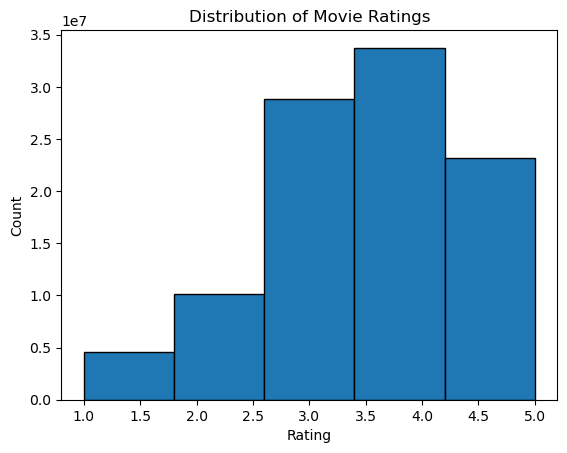

In [5]:
# Distribution of movie rating
import matplotlib.pyplot as plt

plt.hist(Full_merged_data_cleaned["Rating"], bins=5, edgecolor="k")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()

In [6]:
# reset the index to match the input dimensions
# https://keras.io/examples/structured_data/collaborative_filtering_movielens/

# customer_id_mapping = {id: i for i, id in enumerate(Full_merged_data_cleaned['CustomerID'].unique())}
# movie_id_mapping = {id: i for i, id in enumerate(Full_merged_data_cleaned['MovieID'].unique())}

# Full_merged_data_cleaned['CustomerID'] = Full_merged_data_cleaned['CustomerID'].map(customer_id_mapping)
# Full_merged_data_cleaned['MovieID'] = Full_merged_data_cleaned['MovieID'].map(movie_id_mapping)

C:\Temp\ipykernel_14604\105598305.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Full_merged_data_cleaned['CustomerID'] = Full_merged_data_cleaned['CustomerID'].map(customer_id_mapping)
C:\Temp\ipykernel_14604\105598305.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Full_merged_data_cleaned['MovieID'] = Full_merged_data_cleaned['MovieID'].map(movie_id_mapping)


In [7]:
# checking popularity of movies
avg_rating = Full_merged_data_cleaned.groupby('MovieID')['Rating'].mean().reset_index()
avg_rating.columns = ['MovieID', 'AvgRating']

rating_count = Full_merged_data_cleaned.groupby('MovieID')['Rating'].count().reset_index()
rating_count.columns = ['MovieID', 'RatingCount']

# combine the features with the dataframe
Full_merged_data_cleaned = Full_merged_data_cleaned.merge(avg_rating, on='MovieID', how='left')
Full_merged_data_cleaned = Full_merged_data_cleaned.merge(rating_count, on='MovieID', how='left')

# normalizing the popularity features
scaler = StandardScaler()
Full_merged_data_cleaned['AvgRating_scaled'] = scaler.fit_transform(Full_merged_data_cleaned['AvgRating'].values.reshape(-1,1))
Full_merged_data_cleaned['RatingCount_scaled'] = scaler.fit_transform(Full_merged_data_cleaned['RatingCount'].values.reshape(-1,1))

In [8]:
# creating model
train_data, test_data = train_test_split(Full_merged_data_cleaned, test_size=0.3, random_state=42)

train_user_id = train_data['CustomerID'].values
train_movie_id = train_data['MovieID'].values
train_avg_ratings = train_data['AvgRating_scaled'].values
train_avg_count = train_data['RatingCount_scaled'].values
train_target = train_data['Rating'].values

test_user_id = test_data['CustomerID'].values
test_movie_id = test_data['MovieID'].values
test_avg_ratings = test_data['AvgRating_scaled'].values
test_avg_count = test_data['RatingCount_scaled'].values
test_target = test_data['Rating'].values

# defining unique parameters
users = len(customer_id_mapping)
movies = len(movie_id_mapping)
latent_factors = 5

# input layers
customer_input = Input(shape=(1,), name='user_input')
movie_input = Input(shape=(1,), name='movie_input')
avg_rating_input = Input(shape=(1,), name='avg_rating_input')
rating_count_input = Input(shape=(1,), name='rating_count_input')

In [9]:
# embedding layers
user_embedding = Embedding(users, latent_factors, name='user_embedding')(customer_input)
movie_embedding = Embedding(movies, latent_factors, name='movie_embedding')(movie_input)

# flatten embeddings for efficency
user_vectors = Flatten()(user_embedding)
movie_vectors = Flatten()(movie_embedding)

In [10]:
# combining all features
all_features = Concatenate()([user_vectors, movie_vectors, avg_rating_input, rating_count_input])

In [11]:
# creating dense layers for model learning and increase efficiency
dense_layers = Dense(128, activation='relu')(all_features)
output = Dense(1, activation='linear')(dense_layers)

In [12]:
model_1 = Model(inputs=[customer_input, movie_input, avg_rating_input, rating_count_input], outputs=output)
model_1.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# training the model
training = model_1.fit([train_user_id, train_movie_id], train_avg_ratings, train_avg_count,
                      train_target, epochs=5, batch_size= 1800, validation_split=0.2)

# save the mode
model_1.save('D:\\Sem_3\\model_1_lf5_bs1800')

Epoch 1/5
31261/31261 [==============================] - 1219s 39ms/step - loss: 0.8517 - val_loss: 0.7826
Epoch 2/5
31261/31261 [==============================] - 1218s 39ms/step - loss: 0.7628 - val_loss: 0.7652
Epoch 3/5
31261/31261 [==============================] - 1237s 40ms/step - loss: 0.7415 - val_loss: 0.7563
Epoch 4/5
31261/31261 [==============================] - 1209s 39ms/step - loss: 0.7298 - val_loss: 0.7518
Epoch 5/5
31261/31261 [==============================] - 1210s 39ms/step - loss: 0.7229 - val_loss: 0.7496
INFO:tensorflow:Assets written to: D:\Sem_3\model_1_lf5_bs1800\assets


INFO:tensorflow:Assets written to: D:\Sem_3\model_1_lf5_bs1800\assets


In [13]:
from tensorflow.keras.models import load_model
load_model = load_model('D:\\Sem_3\\model_1_lf5_bs1800')

In [14]:
test_model = load_model.evaluate([test_user_id, test_movie_id, test_avg_ratings, test_avg_count], test_target)


941996/941996 [==============================] - 1217s 1ms/step - loss: 0.7491


In [15]:
# predictions
predictions = load_model.predict([test_user_id, test_movie_id, test_avg_ratings, test_avg_count])
rmse = sqrt(mean_squared_error(test_target, predictions))
print(f"RMSE: {rmse}")

941996/941996 [==============================] - 1069s 1ms/step
RMSE: 0.865524298737618


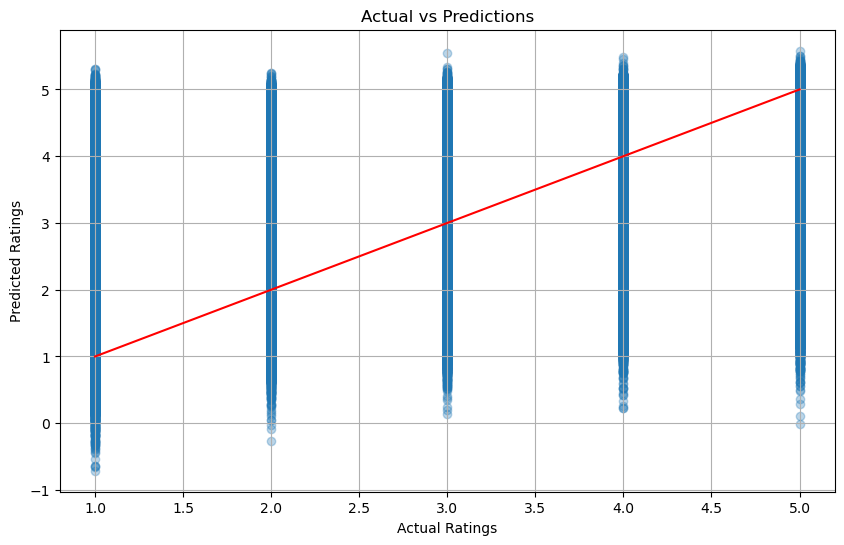

In [28]:
predictions = predictions.flatten()
plt.figure(figsize=(10,6))
plt.scatter(test_target, predictions, alpha=0.3)
plt.title('Actual vs Predictions')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.plot([1,5], [1, 5], 'r')
plt.grid(True)
plt.show()

In [22]:
# testing on unseen data
movie_ids = []
customer_ids = []

probe_dataset = 'C:\\Users\\Aravind\\Downloads\\nf_prize_dataset\\probe.txt'

with open (probe_dataset, 'r') as file:
    current_movie_id = None
    for line in file:
        line = line.strip()
        if ':' in line:
            current_movie_id = int(line.replace(':', ''))
        elif line:
            customer_id = int(line)
            movie_ids.append(current_movie_id)
            customer_ids.append(customer_id)

probe_df = pd.DataFrame({'MovieID': movie_ids, 'CustomerID': customer_ids})
print(probe_df.shape)

(1408395, 2)


In [24]:
# Calculating additional features from our trained model
avg_rating = Full_merged_data_cleaned.groupby('MovieID')['Rating'].mean().reset_index()
rating_count = Full_merged_data_cleaned.groupby('MovieID')['Rating'].count().reset_index()

# creating additional features dataframe
additional_features = pd.merge(avg_rating, rating_count, on='MovieID')

# adding additional features to probe data
probe_data_enriched = pd.merge(probe_df, additional_features, on='MovieID', how='left')
# probe_data_enriched['average_rating'].fillna(probe_data_enriched['average_rating'].mean(), inplace=True)
# probe_data_enriched['rating_count'].fillna(probe_data_enriched['rating_count'].median(), inplace=True)

In [25]:
predictions = load_model.predict(probe_data_enriched)

ValueError: in user code:

    File "C:\Users\Aravind\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Aravind\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aravind\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Aravind\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\Aravind\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Aravind\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model_1" expects 4 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 4) dtype=float64>]
